In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

In [2]:
data = pd.read_json("https://raw.githubusercontent.com/akshaybhalotia/yc_company_scraper/1b0ed0e2b49c873a52f31687e9fa368a43440023/data/yc_essential_data.json")
second_data = pd.read_json("https://raw.githubusercontent.com/akshaybhalotia/yc_company_scraper/ab393b05b6bdf9b26a0e50bb0d8f49769f968bd2/data/yc_essential_data.json")
third_data = pd.read_json("https://raw.githubusercontent.com/akshaybhalotia/yc_company_scraper/98cd839934133edecaf0a21e418412890fd6fd33/data/yc_essential_data.json")

In [3]:
def process(data, stop_words = [], key_words=[]):
  tags = []
  for line in data['industries']:
    if len(line):
      for tag in line:
        if key_words:
          if tag in key_words:
            tags.append(tag)
        else:
          tags.append(tag)

  x = sorted(list(set(tags)))
  x_main = x.copy()
  for word in stop_words:
    if word in x_main:
      x_main.pop(x_main.index(word))

  y = [tags.count(item) for item in x_main]
  return x_main, y

In [ ]:
x_first, y_first = process(data, ["B2B", "Consumer"])
x_second, y_second  = process(second_data, ["Consumer", "B2B Software and Services"])
x_third, y_third = process(third_data,  ["Consumer", "B2B Software and Services"])

In [ ]:
import numpy as np
def compraison(x_first, y_first, y_second,y_third, title='', size=(10,15)):
    plt.figure(figsize=size)
    plt.xlabel('Tag', fontweight ='bold', fontsize = 15)

    barWidth = 0.25
    br1 = np.arange(len(y_first))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    plt.barh(br1, y_first, alpha = 0.5, label = '10-23', height = barWidth)
    plt.barh(br2, y_second, alpha = 0.5, label = '2-23', height = barWidth)
    plt.barh(br3, y_third, alpha = 0.5, label = '04-22', height = barWidth)

    plt.yticks([r + barWidth for r in range(len(y_first))],
            x_first)
    plt.legend()
    plt.title(title, fontweight ='bold', fontsize = 15)
    plt.show()

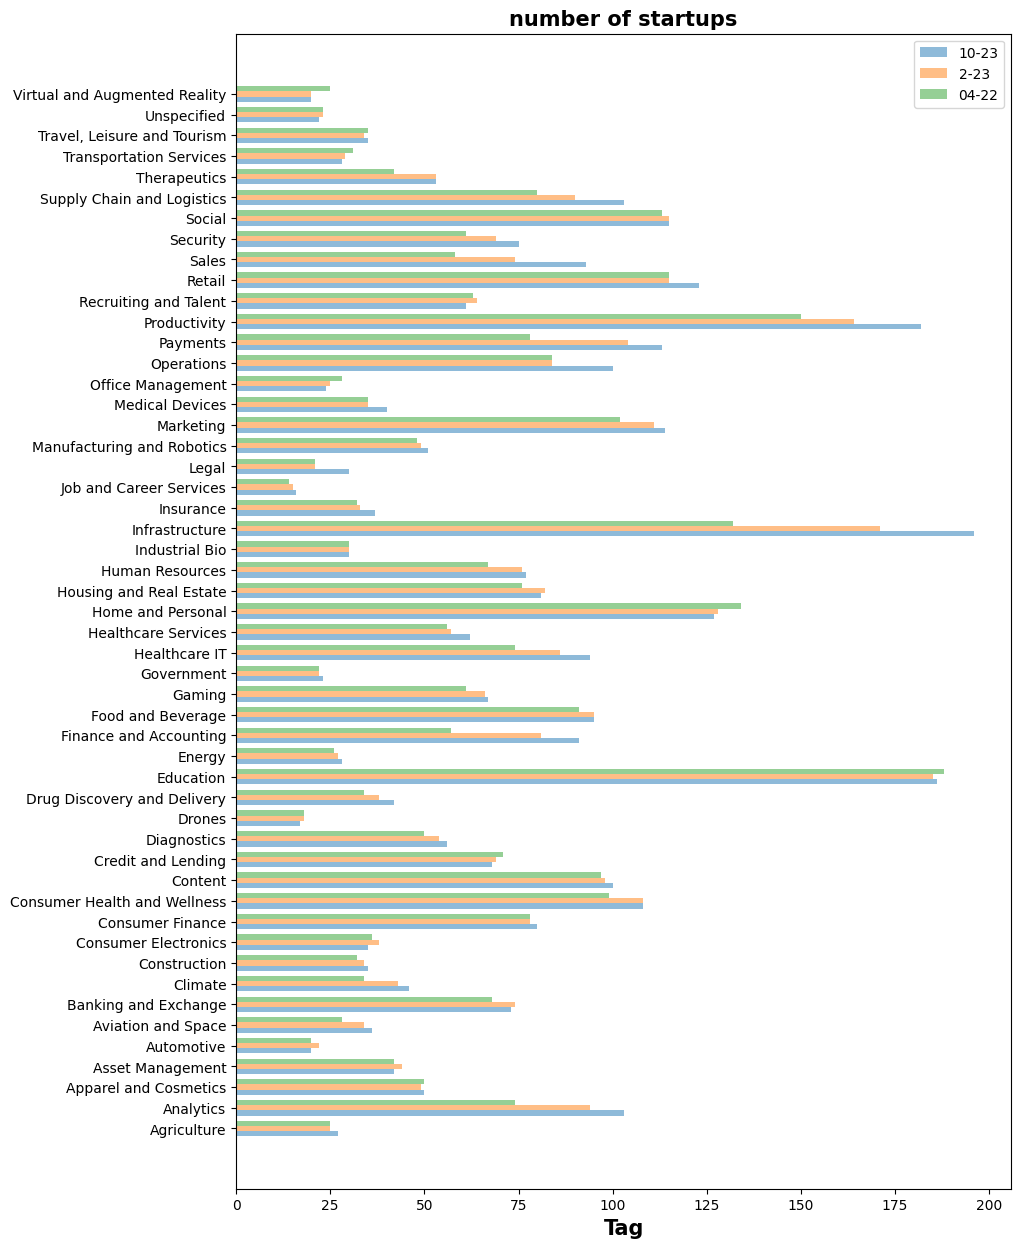

In [ ]:
compraison(x_first, y_first, y_second, y_third, "number of startups" )

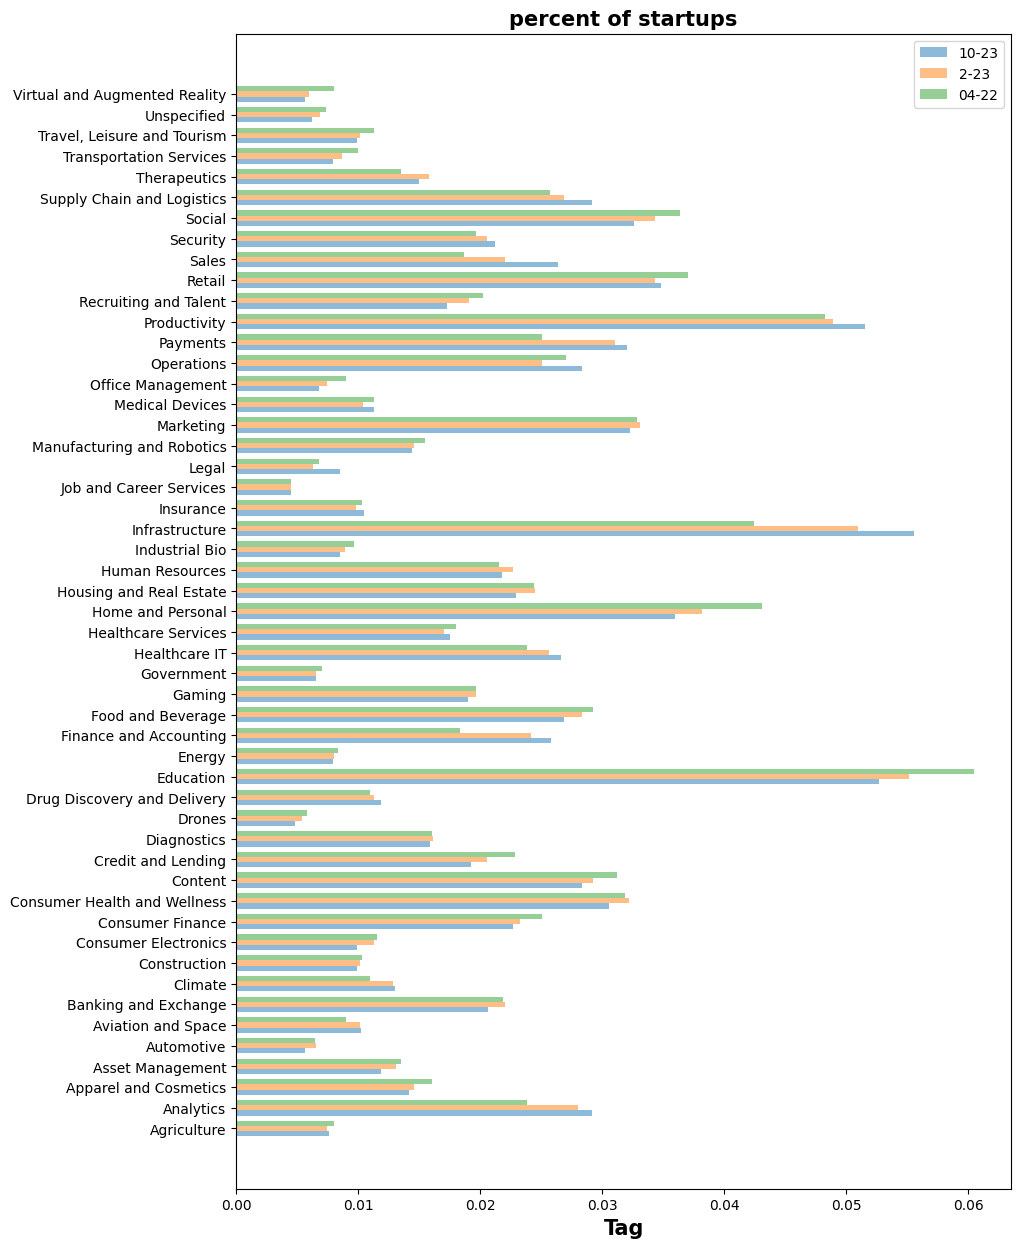

In [ ]:
compraison(x_first,  np.array(y_first)/np.sum(y_first), np.array(y_second)/np.sum(y_second), np.array(y_third)/np.sum(y_third), 'percent of startups')

In [ ]:
def process_lists(data, stop_words = [] , key_words = []):
  tags = []
  copy_it = data['industries'].copy()
  for line in copy_it:
    if len(line):
       for stop_word in stop_words:
        if stop_word in line:
          line.pop(line.index(stop_word))
       if len(line):
        if key_words:
          for word in key_words:
            if word in line:
              tags.append(sorted(line))
              break
        else:
          tags.append(sorted(line))
  return tags, y

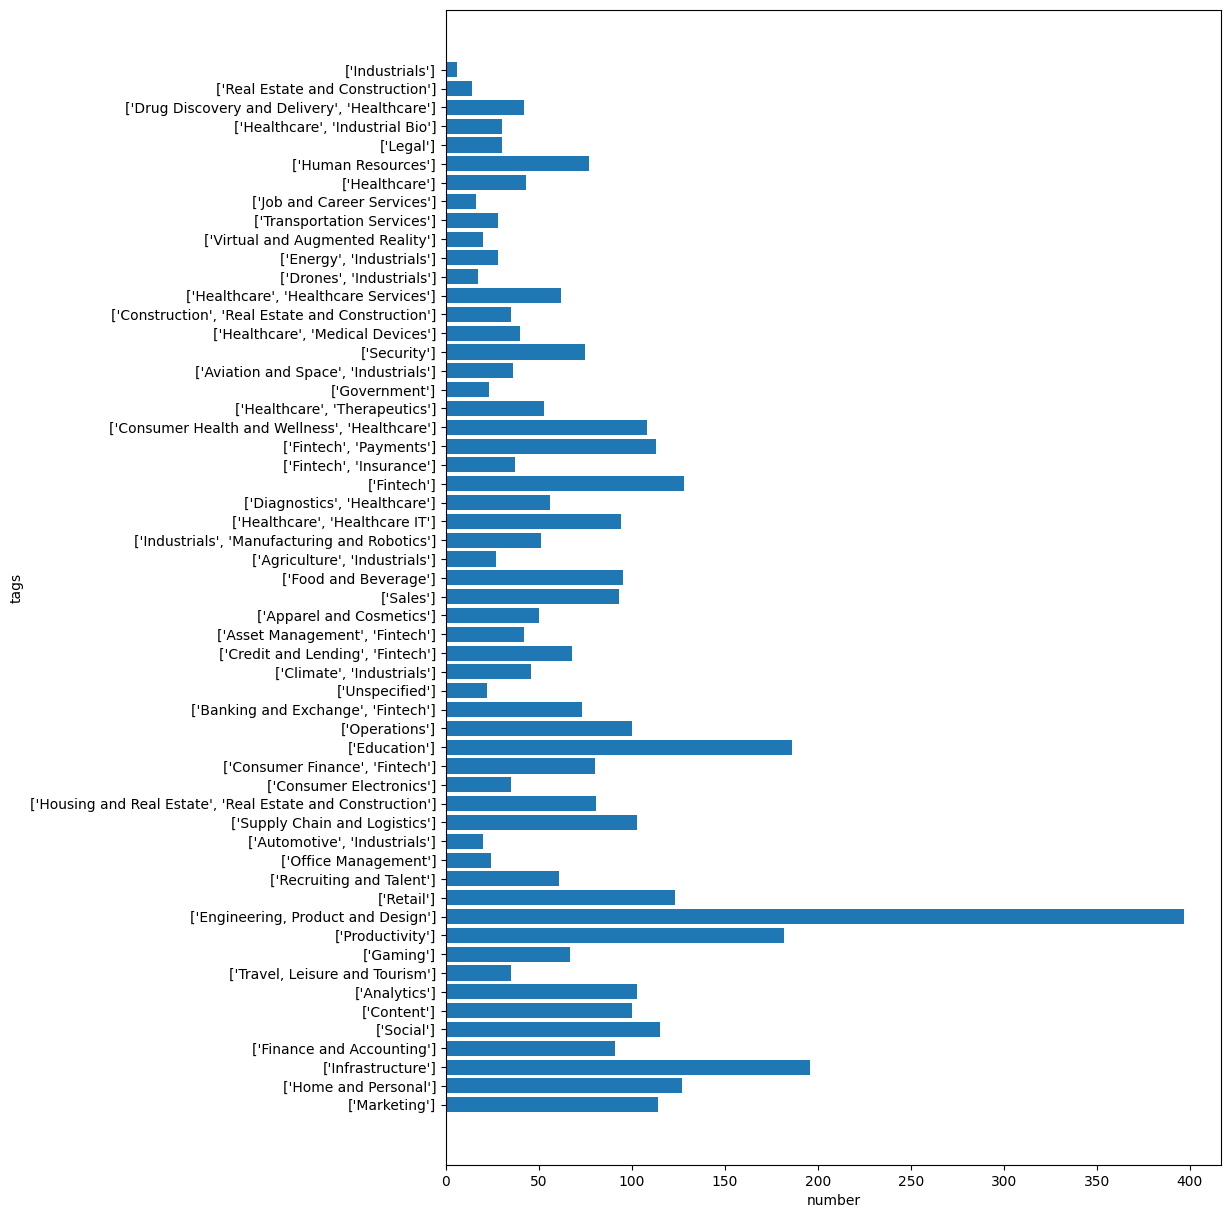

In [ ]:
x_test, y_test = process_lists(data, ["B2B", "Consumer"] , key_words = [])
y = [x_test.count(item) for item in x_test]
plt.figure(figsize=(10,15))
plt.barh([str(label) for label in x_test], y)
plt.xlabel("number")
plt.ylabel('tags')
plt.show()

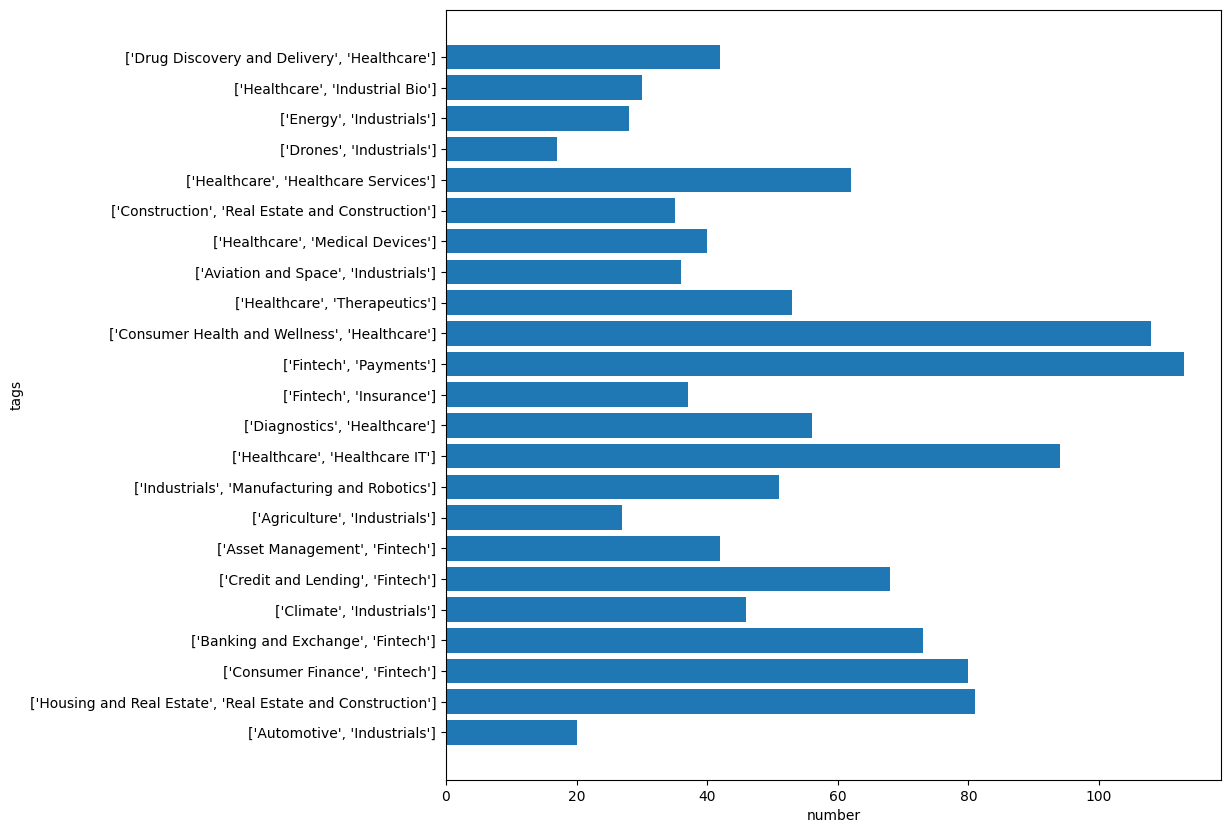

In [ ]:
tags = []
for label in x_test:
  if len(label) > 1:
    tags.append(label)
y = [tags.count(item) for item in tags]
plt.figure(figsize=(10,10))
plt.barh([str(label) for label in tags], y)
plt.xlabel("number")
plt.ylabel('tags')
plt.show()

In [ ]:
group_tags = ['Healthcare', 'Industrials', 'Fintech']

In [ ]:
x_tmp, y_tpm = process_lists(data, key_words=['Housing and Real Estate', 'Real Estate and Construction'])

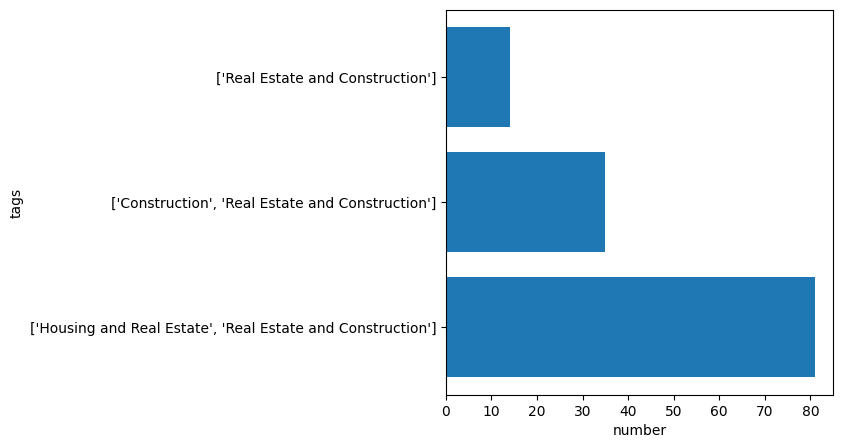

In [ ]:
y = [x_tmp.count(item) for item in x_tmp]
plt.figure(figsize=(5,5))
plt.barh([str(label) for label in x_tmp], y)
plt.xlabel("number")
plt.ylabel('tags')
plt.show()

In [ ]:
group_tags.append('Real Estate and Construction')
group_tags.append('Engineering, Product and Design')

In [ ]:
forbidden = ["B2B", "Consumer"]

In [ ]:
x_first, y_first = process(data, stop_words=(group_tags + forbidden))

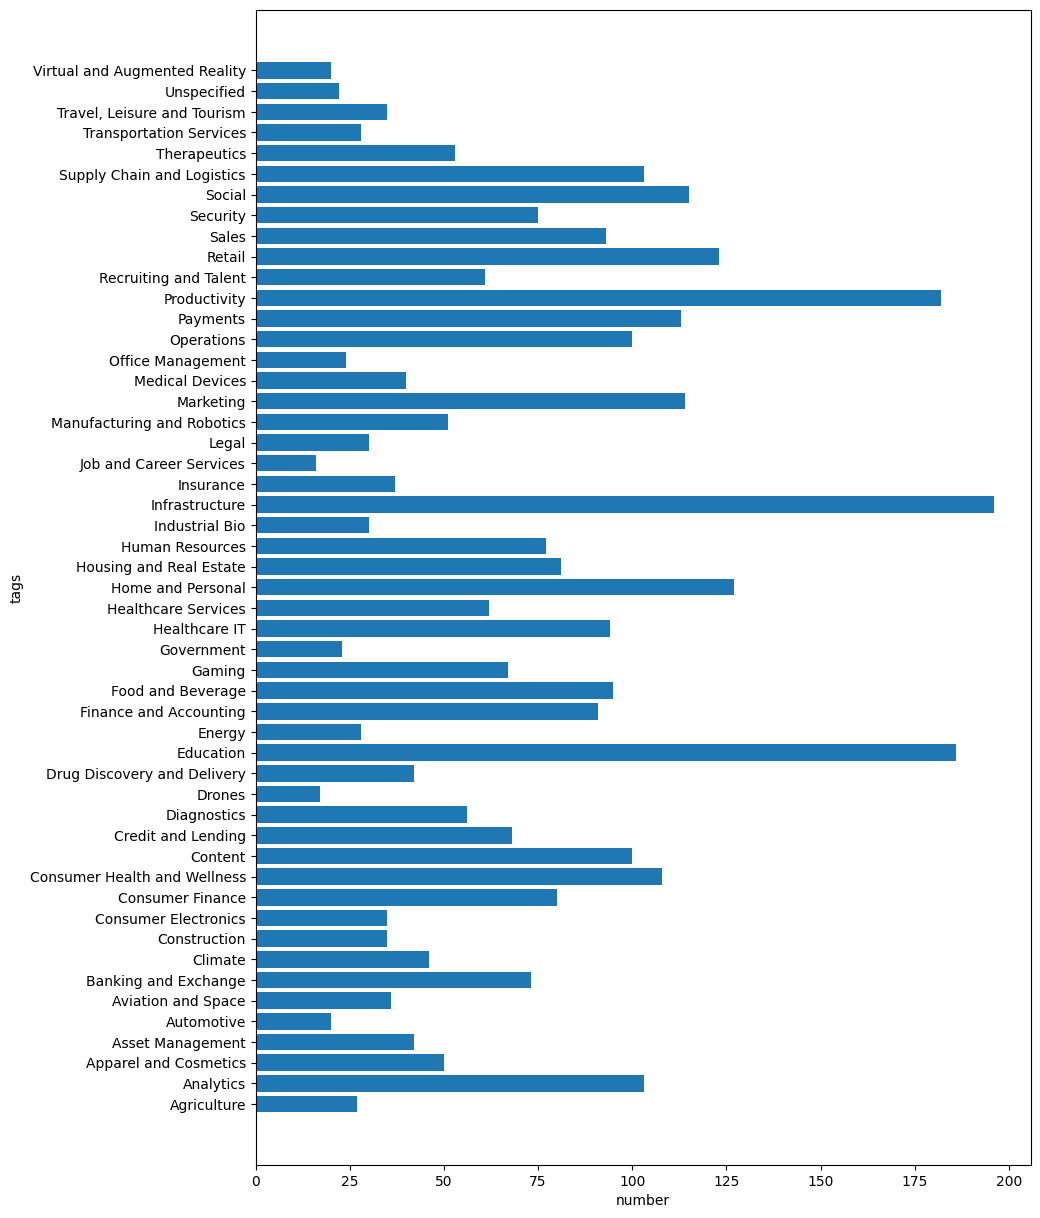

In [ ]:
plt.figure(figsize=(10,15))
plt.barh([str(label) for label in x_first], y_first)
plt.xlabel("number")
plt.ylabel('tags')
plt.show()

In [ ]:
group_tags = ['Healthcare', 'Industrials', 'Financial Technology', 'Real Estate and Construction', 'Engineering, Product and Design']
x_second, y_second  = process(second_data,  stop_words=(group_tags + ["Consumer", "B2B Software and Services"]))
x_third, y_third = process(third_data,  stop_words=(group_tags + ["Consumer", "B2B Software and Services"]))

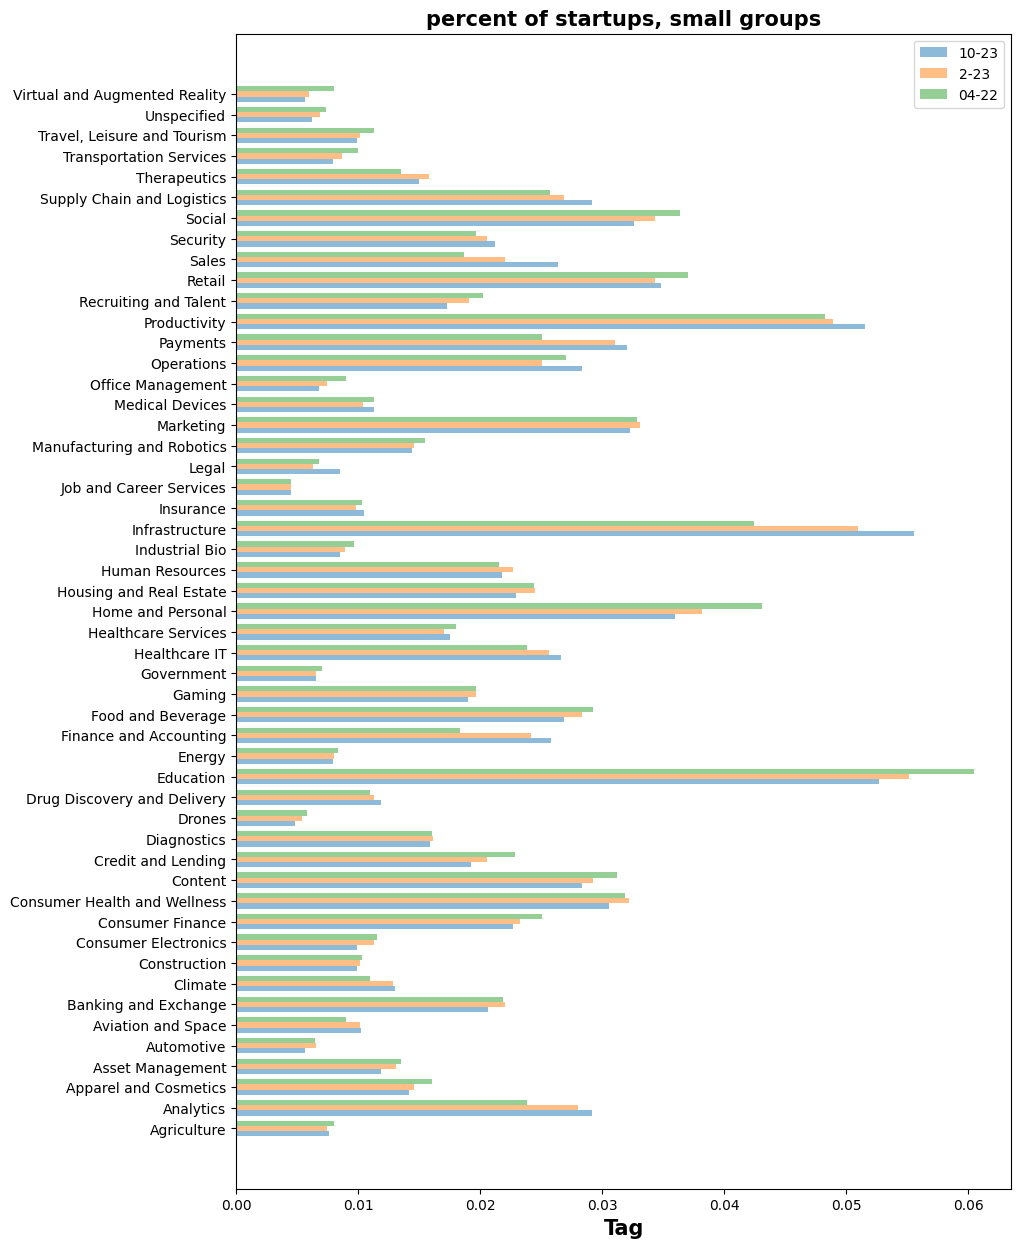

In [ ]:
compraison(x_first,  np.array(y_first)/np.sum(y_first), np.array(y_second)/np.sum(y_second), np.array(y_third)/np.sum(y_third), 'percent of startups, small groups')

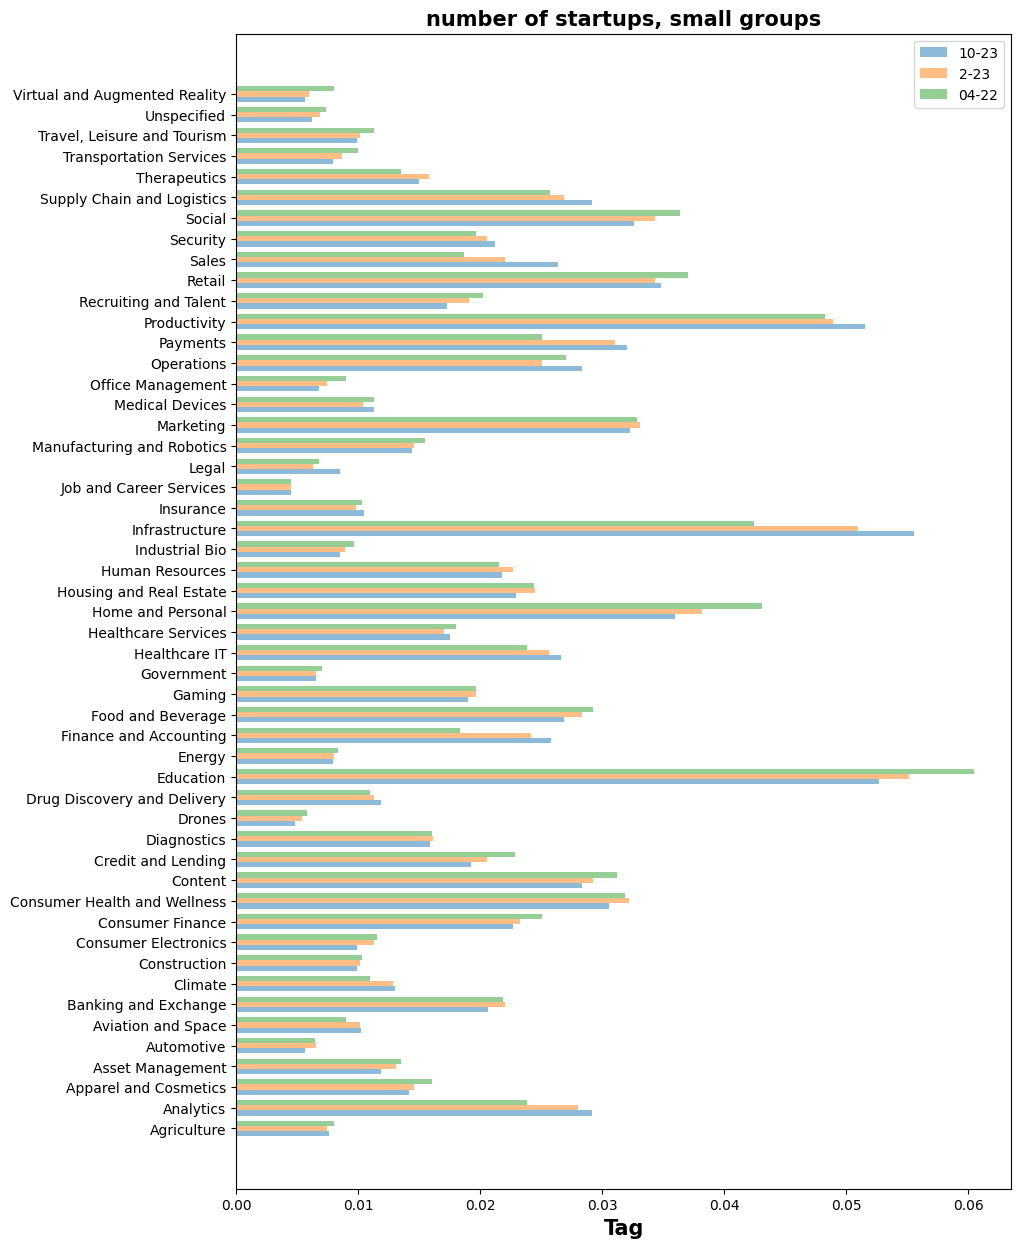

In [ ]:
compraison(x_first,  np.array(y_first)/np.sum(y_first), np.array(y_second)/np.sum(y_second), np.array(y_third)/np.sum(y_third), 'number of startups, small groups')

In [ ]:
group_tags = ['Healthcare', 'Industrials', 'Fintech', 'Real Estate and Construction', 'Engineering, Product and Design']
forbidden = ["B2B", "Consumer"]
x_first, y_first = process(data, stop_words=forbidden, key_words=group_tags)
group_tags = ['Healthcare', 'Industrials', 'Financial Technology', 'Real Estate and Construction', 'Engineering, Product and Design']
x_second, y_second  = process(second_data,  stop_words=["Consumer", "B2B Software and Services"], key_words=group_tags)
x_third, y_third = process(third_data,  stop_words=["Consumer", "B2B Software and Services"], key_words=group_tags)

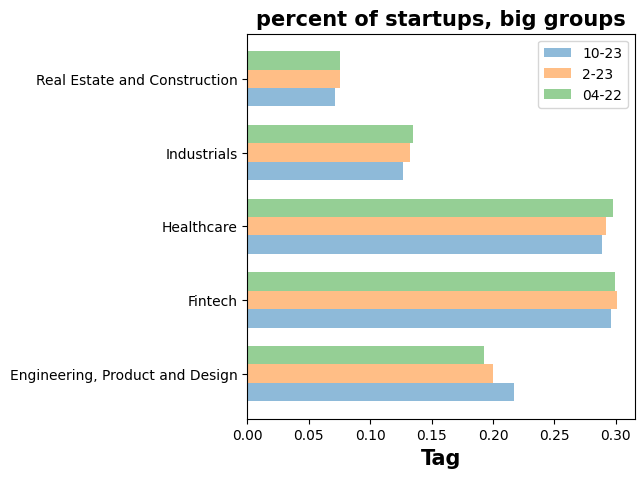

In [ ]:
compraison(x_first,  np.array(y_first)/np.sum(y_first), np.array(y_second)/np.sum(y_second), np.array(y_third)/np.sum(y_third), 'percent of startups, big groups', size=(5,5))

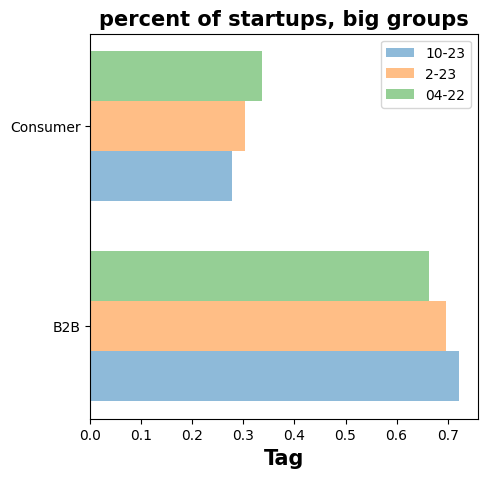

In [ ]:
forbidden = ["B2B", "Consumer"]
x_first, y_first = process(data,  key_words=forbidden)
x_second, y_second  = process(second_data, key_words=["Consumer", "B2B Software and Services"])
x_third, y_third = process(third_data,  key_words=["Consumer", "B2B Software and Services"])

compraison(x_first,  np.array(y_first)/np.sum(y_first), np.array(y_second)/np.sum(y_second), np.array(y_third)/np.sum(y_third), 'percent of startups, big groups', size=(5,5))

In [22]:
import seaborn as sns
sns.set_style("darkgrid")

In [23]:
import numpy as np

data_time = pd.read_csv('multiTimeline.csv')
healthcare = np.array(data_time.iloc[:, 1])
fintech = np.array(data_time.iloc[:, 2])
engineering = np.array(data_time.iloc[:, 3])

In [24]:
healthcare = healthcare - healthcare[0]
fintech = fintech - fintech[0]
engineering = engineering - engineering[0]

In [25]:
healthcare = healthcare / max(healthcare)
fintech = fintech / max(fintech)
engineering = engineering / max(engineering)
date = data_time.iloc[:, 0]

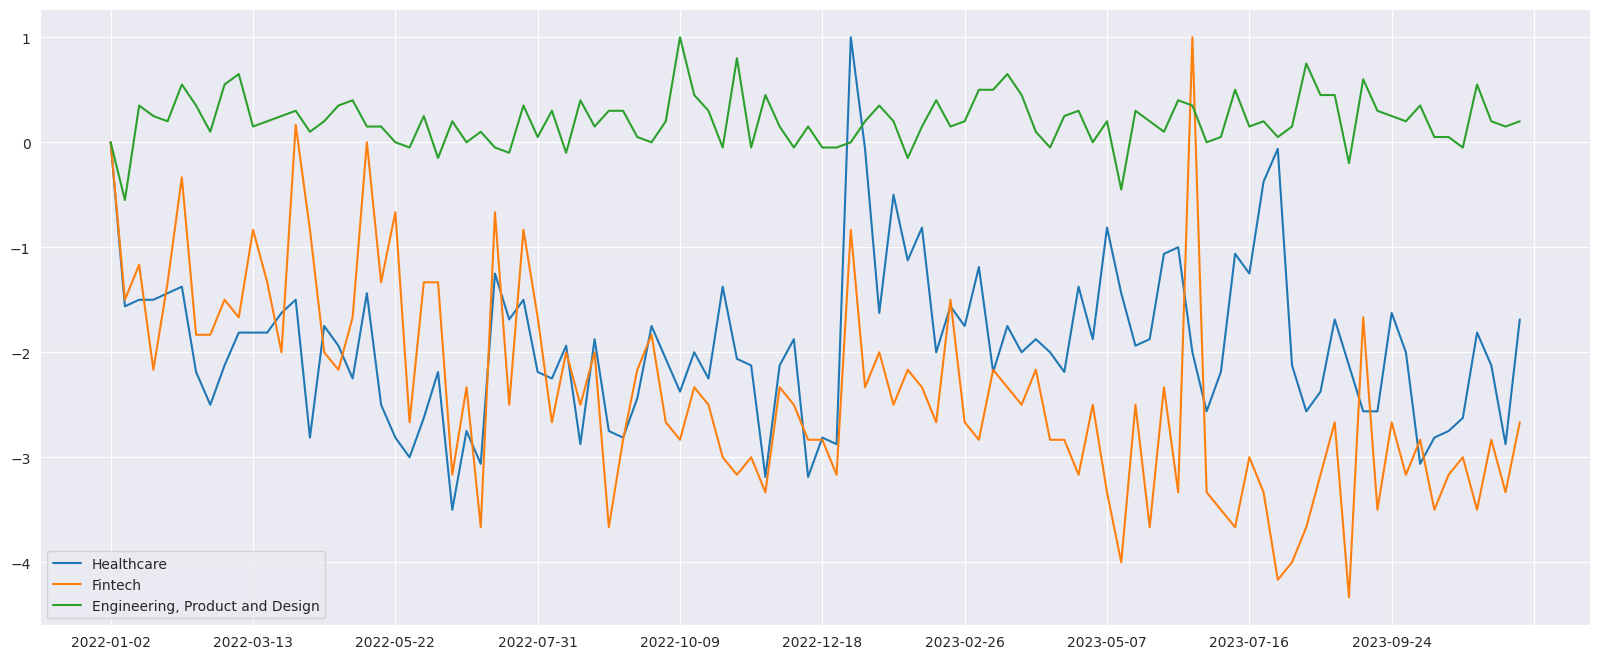

In [26]:
plt.figure(figsize=(20,8))
plt.plot(date, healthcare, label='Healthcare')
plt.plot(date, fintech, label='Fintech')
plt.plot(date, engineering, label='Engineering, Product and Design')
plt.xticks([label if i % 10 == 0 else '' for i, label in enumerate(list(data_time.iloc[:, 0]))])
plt.legend()
plt.show()